In [1]:
from fastai.data.all import *
from fastai.vision.all import *
from fastai.metrics import error_rate
from pathlib import Path
import gc
import fastai
fastai.__version__
torch.cuda.empty_cache()

In [2]:
path = Path("/home/pc/Documents/tomato_dataset/Train_model_menor")
dls = DataBlock((ImageBlock, CategoryBlock),
get_items = get_image_files,
splitter = RandomSplitter(valid_pct = 0.3, seed = 42),
get_y = parent_label,
item_tfms =[Resize(640)]
).dataloaders(path, bs=32)

#diferença entre valid_pct
#pq o modelo começa tão acertivo = tamanho do dataset
#variar a seed
#pct=0.2 seed = 42 bs=32



In [3]:
torch.cuda.empty_cache()
#  Path é o caminho dos dados do dataset;
# O primeiro parameto é o tipo do dado que vai ser usado no modelo, no caso de ImageBlock, imagens;
# O segundo parametro CategoryBlock é um empacotador de dados básico que vincula transformações padrão para a API;
#  Getimagefiles é a função usada para falar que os dados estão em pastas, é utilizado para multiclasses, assim ele varre todos os diretorios dentro do "Path";
#  plitter é usado para dividir os dados entre validação e treinamento, no caso do Datablock a cima foi usado um RandomSplitter que vai dividir os dados aleatoriamente;
# Validpct é a quantidade de dados que serão usado para a validação, no caso vinte porcento. E o seed é usado para que toda vez que rodarmos o código do datablock ele faça a mesma divisão;
#  Get y é o nome da label que sera dada para a classificação. Nesse projeto foi utilizado a parent label que é o nome do diretorio o qual o dado estava, logo o resultado da classificação terá o nome de uma doença como mostrado na figura 5;
#   Item tfms é o parâmetro que usamos para aplicar o data augmentation.


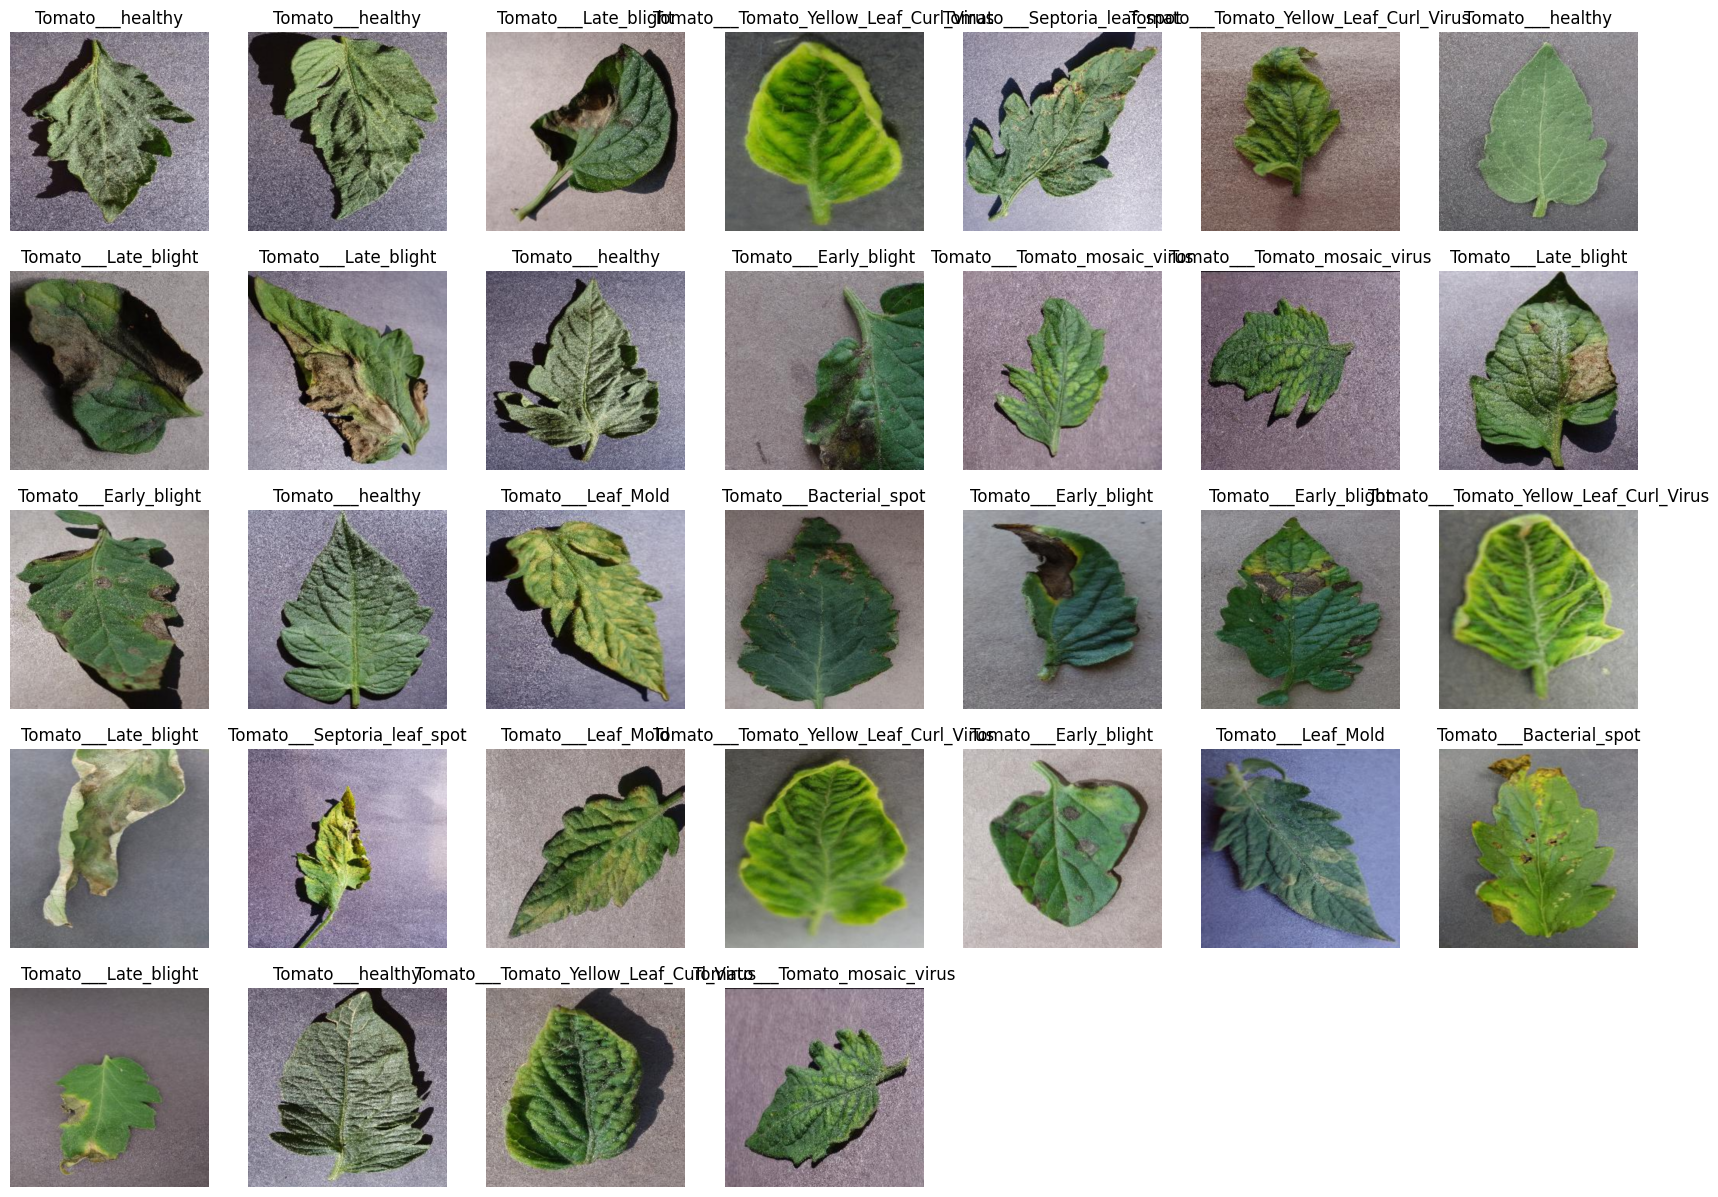

In [4]:
dls.show_batch(max_n = 32)  


In [3]:
gc.collect()


learn = cnn_learner(dls, resnet34, LossMetrics, metrics=[error_rate,accuracy])
#learn.fit_one_cycle(10)
learn.fine_tune(8)

#para ter grafico durante treinamento setar um callback

#learn = vision_learner(dls, resnet34, metrics=[error_rate,accuracy])
#learn.fine_tune(10)
#fazer outros  exemplos com outras arquiteturas

#fine_tune is a particular combination of fit_one_cycle(s) + (un)freeze(s), that works well in a lot (if not most) situations... 
# +/- fit_one_cycle = New Model
# +/- fine_tuning = with Transfer Learning


/home/pc/.local/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/pc/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pc/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


OutOfMemoryError: CUDA out of memory. Tried to allocate 200.00 MiB (GPU 0; 3.81 GiB total capacity; 3.39 GiB already allocated; 98.38 MiB free; 3.41 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

: 

In [102]:
learn.fit(8, 1e-06)

KeyboardInterrupt: 

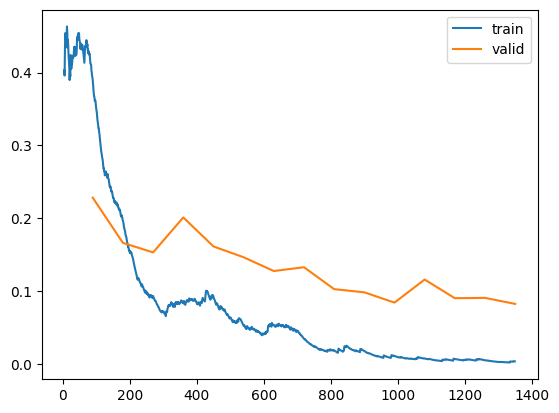

In [32]:

learn.recorder.plot_loss()



In [4]:

Learner.export(learn, "esseaquimesmo.pkl")

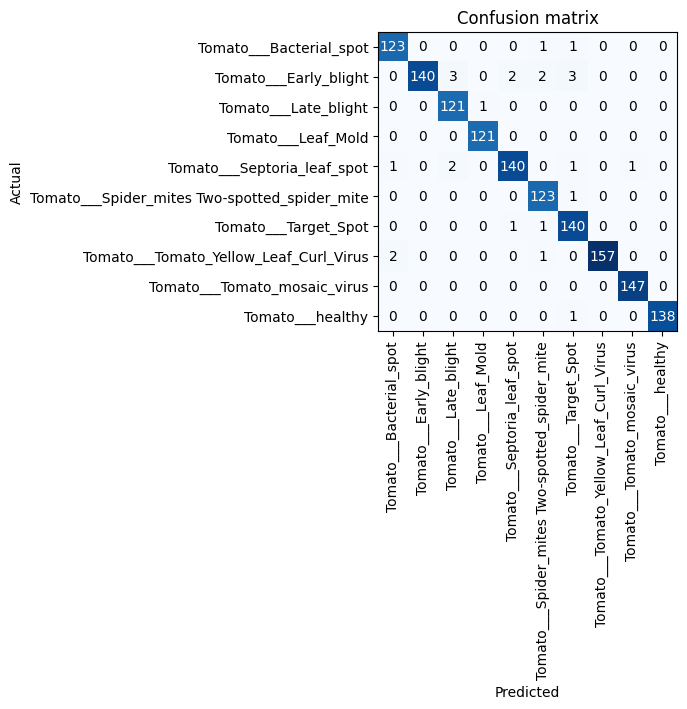

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(7,7),dpi=100)

[TensorBase(733)]/home/pc/Documents/tomato_dataset/Train_model_menor/Tomato___Early_blight/a1e875bd-5c06-4031-b0c0-9413d754df0e___RS_Erly.B 8221.JPG
[TensorBase(102)]/home/pc/Documents/tomato_dataset/Train_model_menor/Tomato___Tomato_Yellow_Leaf_Curl_Virus/f19b732b-44ec-49c7-9cac-2278a8f5fce3___UF.GRC_YLCV_Lab 08569.JPG
[TensorBase(131)]/home/pc/Documents/tomato_dataset/Train_model_menor/Tomato___Early_blight/4c927622-ea22-4718-8e36-319218ee53bf___RS_Erly.B 7712.JPG
[TensorBase(515)]/home/pc/Documents/tomato_dataset/Train_model_menor/Tomato___healthy/07776423-f0af-455c-a7c1-36215c7e7097___RS_HL 0321.JPG
[TensorBase(614)]/home/pc/Documents/tomato_dataset/Train_model_menor/Tomato___Early_blight/5688c1fd-cd1f-4fb5-9e0b-d12c0c095023___RS_Erly.B 9511_flipTB.JPG
[TensorBase(126)]/home/pc/Documents/tomato_dataset/Train_model_menor/Tomato___Early_blight/9d64c577-43dd-4409-b0ed-f5460bc01dc9___RS_Erly.B 7685.JPG
[TensorBase(1022)]/home/pc/Documents/tomato_dataset/Train_model_menor/Tomato___Septo

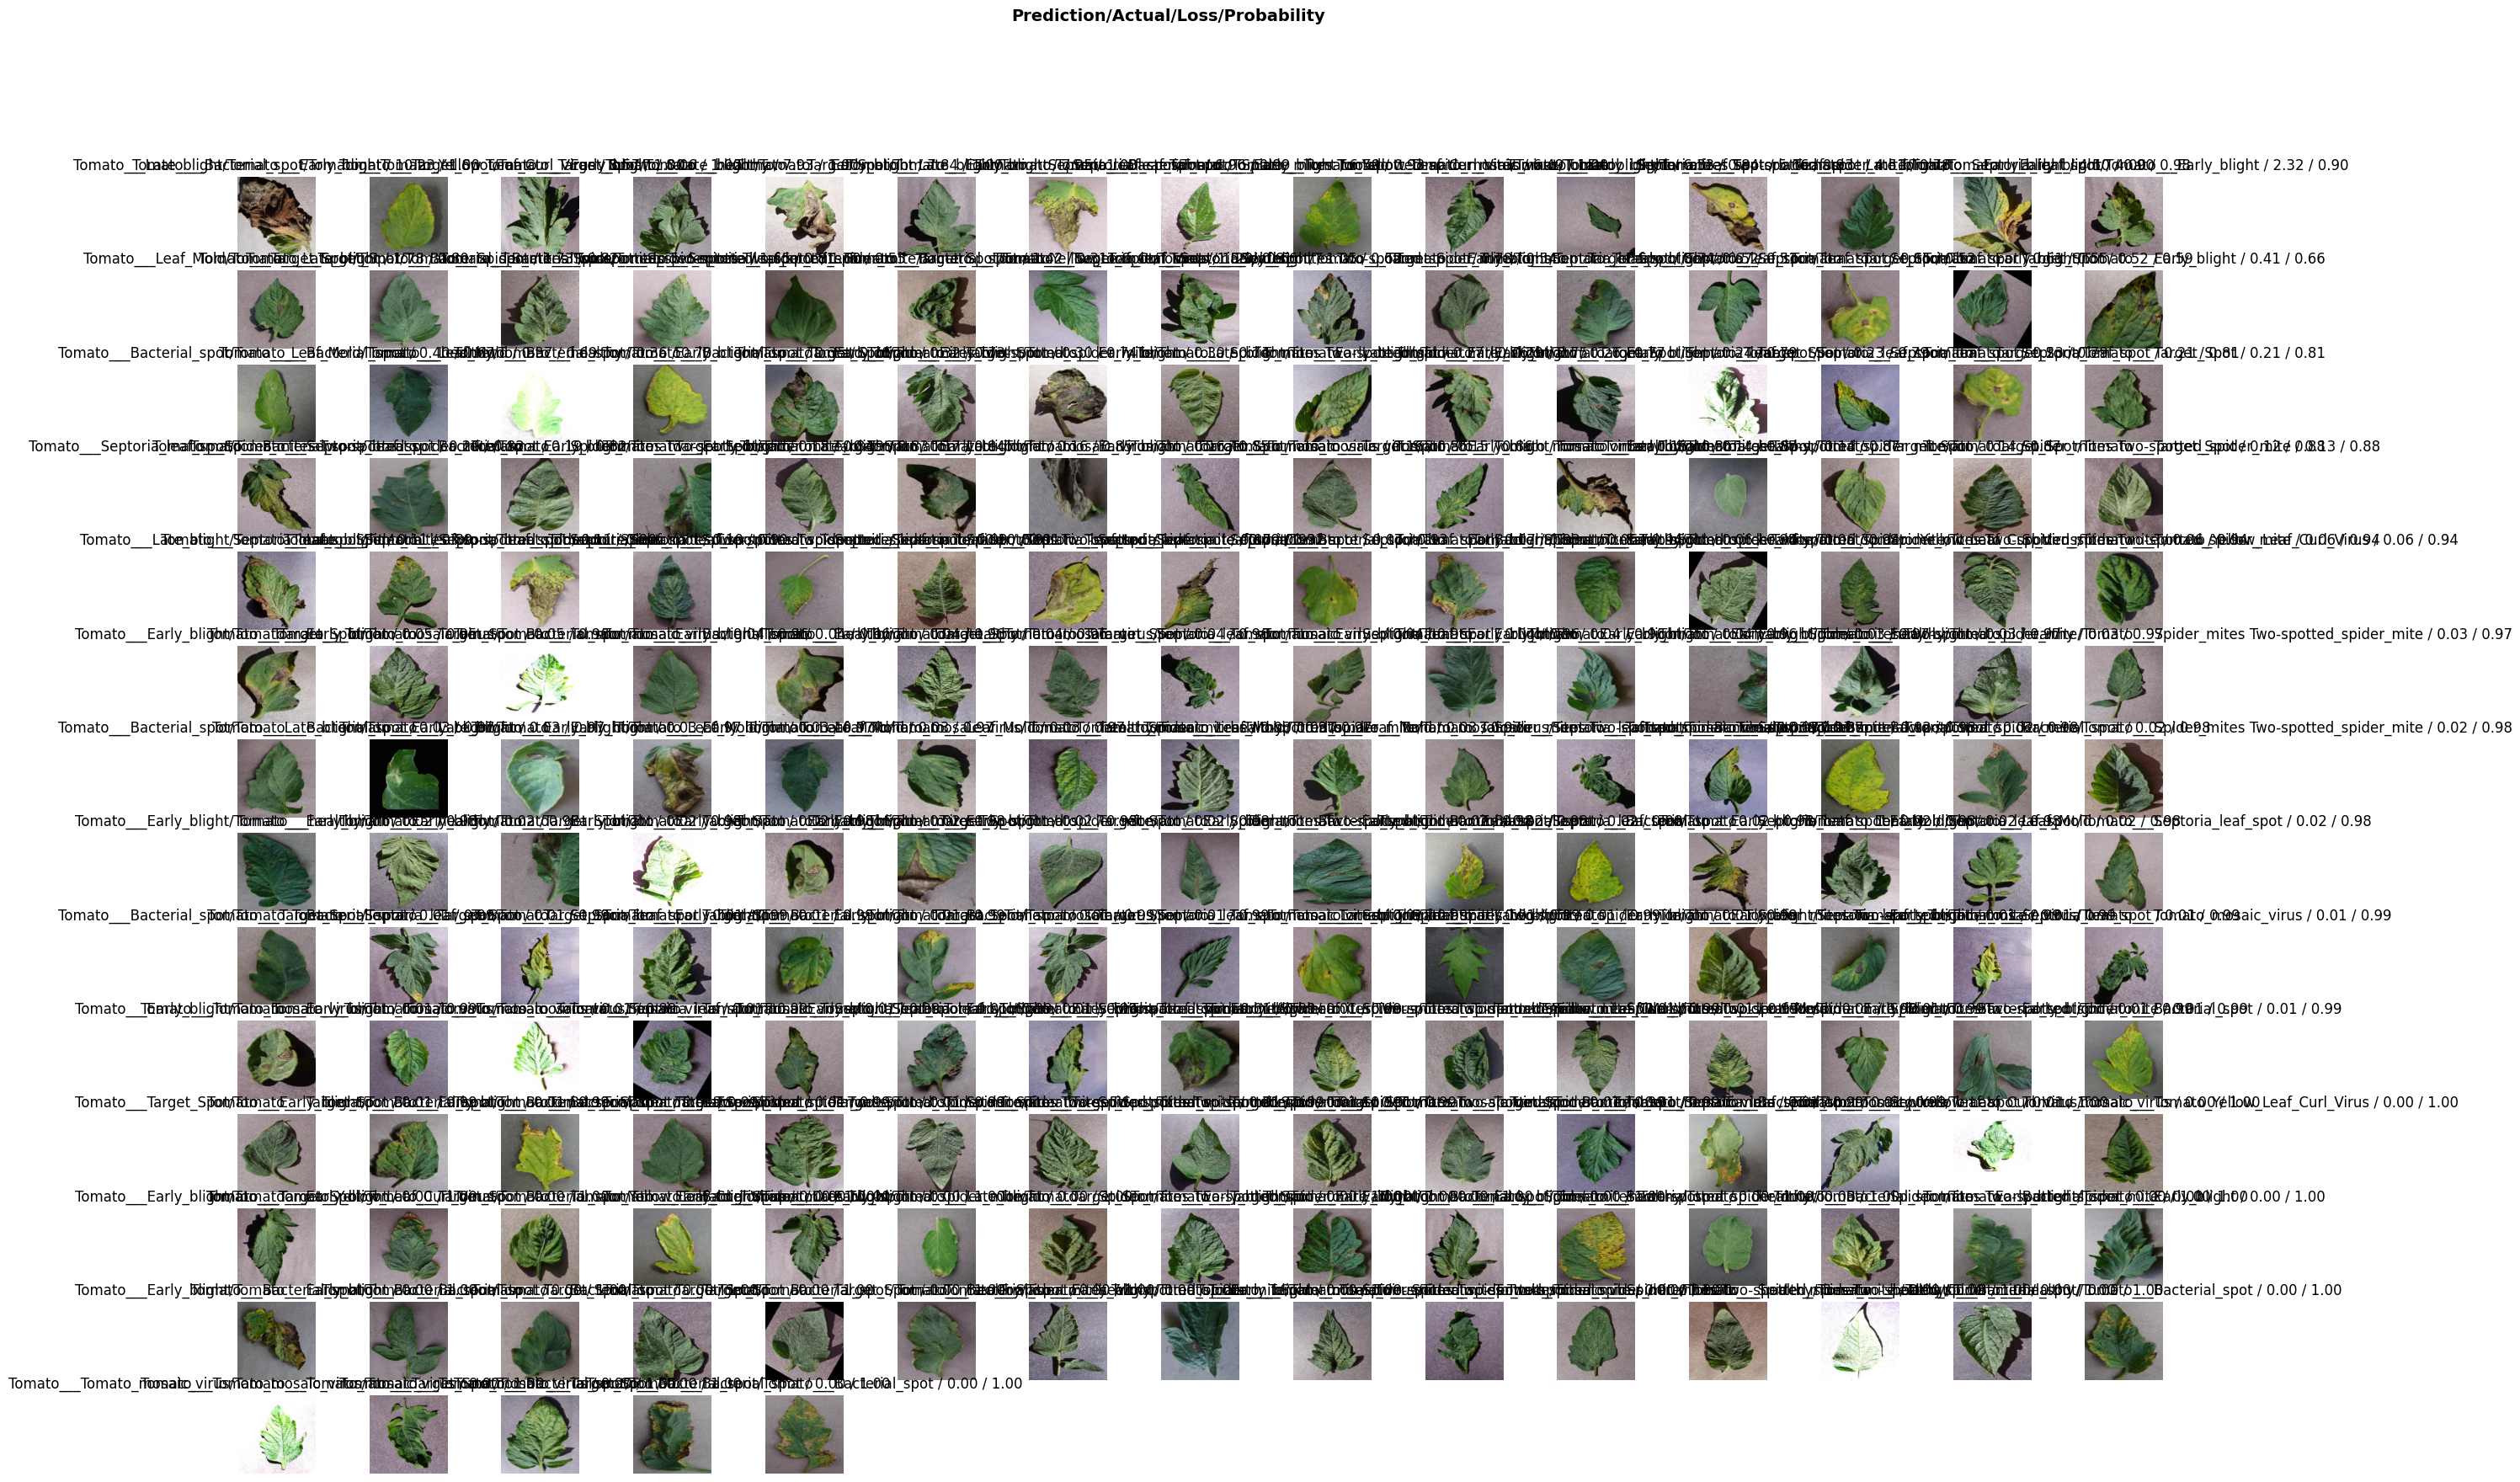

In [22]:
losses,idxs = interp.top_losses()
interp.plot_top_losses(200,figsize=(30,20))
for i in idxs[:200]:
    print(f"[{i}]{dls.valid_ds.items[i]}")

In [23]:
learn.lr_find(stop_div=False, num_it=50)
recorder.plot(suggestion=True)




RuntimeError: Exception occured in `LRFinder` when calling event `before_fit`:
	CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [19]:
min_grad_lr = learn.recorder.min_grad_lr
min_grad_lr

AttributeError: 'Sequential' object has no attribute 'plot'

In [ ]:
nvidia-smi --query-gpu=timestamp,pstate,temperature.gpu,utilization.gpu,utilization.memory,memory.total,memory.free,memory.used --format=csv -l 1
timestamp, pstate, temperature.gpu, utilization.gpu [%], utilization.memory [%], memory.total [MiB], memory.free [MiB], memory.used [MiB]

In [72]:
pred_class, pred_idx, outputs = potato.predict("/home/pc/Documents/tomato_dataset/train/Tomato___Early_blight/0a2726e0-3358-4a46-b6dc-563a5a9f2bdf___RS_Erly.B 7860.JPG")

In [73]:
print(pred_class)
print(pred_idx)
print(outputs)

Tomato___Early_blight
tensor(1)
tensor([3.8352e-05, 9.9761e-01, 1.4026e-04, 3.6340e-06, 1.1994e-05, 3.9303e-04,
        1.7925e-03, 1.6886e-06, 6.8190e-06, 5.5592e-06])


In [ ]:

#ClassificationInterpretation()
#Interpretation.from_learner (learn, ds_idx:int=1,
#dl:fastai.data.load.DataLoader=None,
#act=None)

#https://docs.fast.ai/interpret.html